In [13]:
import pandas as pd
import numpy as np

### Taking Last 8 Quarters for testing

In [14]:
def split(X,Y):
    X_train = X[:-8]
    X_test = X[-8:]
    y_train = Y[:-8]
    y_test = Y[-8:]
    
    return X_train, X_test, y_train, y_test

In [23]:
from sklearn.model_selection import train_test_split

def random_forest(df):
    #df = df.drop(columns=['Quarter end'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    X = df
    Y = X['Price']
    Y = Y[1:]
    
    #Getting Next Quarter %change of price 
    #This will be our target variable

    X = X[:-1]
    X = X.values
    Y = Y.values
    
    
    X_train, X_test, y_train, y_test = split( X, Y)
    X_train_means = np.mean(X_train, axis = 0)
    X_train_std = np.std(X_train, axis = 0)
    X_train_scaled = (X_train - X_train_means)/X_train_std
    
    #print(np.shape(X_train_scaled)[1])

    X_test_scaled = (X_test - X_train_means)/X_train_std
    # Import the model we are using
    from sklearn.ensemble import RandomForestRegressor
    # Instantiate model with 1000 decision trees
    rf = RandomForestRegressor(n_estimators = 1000,max_depth = 30 ,max_features = 'sqrt',min_samples_leaf=4, random_state = 42)
    # Train the model on training data
    rf.fit(X_train_scaled, y_train)
    # Use the forest's predict method on the test data
    predictions = rf.predict(X_test_scaled)
    score = rf.score(X_train_scaled,y_train)
    
    test_score = rf.score(X_test_scaled,y_test)
    
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    
    return predictions,y_test,score,test_score,importances

In [5]:
df = pd.read_csv("./All_Data/clean_data/AXP_quarterly_financial_data.csv", delimiter = ',')
df.head()

,Quarter end,Assets,Liabilities,Shareholders equity,Revenue,Earnings,Earnings available for common stockholders,EPS basic,EPS diluted,Cash from operating activities,...,Price,ROE,ROA,Book value of equity per share,P/B ratio,P/E ratio,Cumulative dividends per share,Equity to assets ratio,Net margin,Asset turnover
0,1993-12-31,0.030489,0.028701,0.047973,0.040024,0.011331,0.011331,0.000000,0.265306,-0.792649,...,-0.098867,0.08062,0.013605,0.042230,-0.047297,0.090157,inf,0.017241,-0.026289,0.0
1,1994-03-31,0.030489,0.028701,0.047973,0.040024,0.011331,0.011331,0.000000,0.265306,-0.792649,...,-0.098867,0.08062,0.013605,0.042230,-0.047297,0.090157,inf,0.017241,-0.026289,0.0
2,1994-06-30,-0.015495,0.010165,-0.261772,0.040024,0.011331,0.011331,0.000000,0.265306,-0.792649,...,-0.008000,0.08062,0.013605,-0.262561,-0.047297,0.090157,16.250000,-0.250000,-0.026289,0.0
3,1994-09-30,0.028231,0.029208,0.015391,0.027366,0.033613,0.033613,0.028986,0.265306,-9.568562,...,0.099078,0.08062,0.013605,-0.008791,0.489362,0.090157,0.050725,-0.012712,-0.026289,0.0
4,1994-12-31,-0.012109,-0.008332,-0.062382,0.053552,-0.094851,-0.094851,-0.154930,0.265306,-0.612412,...,0.044025,0.08062,0.013605,-0.044346,0.052381,0.090157,0.103448,-0.051502,-0.026289,0.0


In [6]:
df.columns

Index(['Quarter end', 'Assets', 'Liabilities', 'Shareholders equity',
       'Revenue', 'Earnings', 'Earnings available for common stockholders',
       'EPS basic', 'EPS diluted', 'Cash from operating activities',
       'Cash from investing activities', 'Cash from financing activities',
       'Cash change during period', 'Cash at end of period', 'Price', 'ROE',
       'ROA', 'Book value of equity per share', 'P/B ratio', 'P/E ratio',
       'Cumulative dividends per share', 'Equity to assets ratio',
       'Net margin', 'Asset turnover'],
      dtype='object')

### Running Random Forest For all stocks

In [7]:
filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

all_preds = {}
all_labels = {}

i = 0

scores = []
test_scores =[]
importances = []

#for i in range(15):
for i in range(len(filenames)):
    try:
        df = pd.read_csv("./new_clean_data/"+str(filenames[i]), delimiter = ',')
        preds,labels,score,test_score,importance = random_forest(df)
        
        scores.append(score)
        test_scores.append(test_score)
        importances.append(importance)
        
        all_preds[str(filenames[i])] = preds
        all_labels[str(filenames[i])] = labels
    except:
        s=2

In [21]:
all_preds

{'AAN_quarterly_financial_data.csv': array([-0.00030345, -0.01618251,  0.06689659,  0.00070211,  0.00828027,
         0.05460691,  0.03451324, -0.00277147]),
 'AAPL_quarterly_financial_data.csv': array([ 0.0429458 ,  0.10045227,  0.08544239,  0.05998077,  0.04860427,
         0.10575649,  0.08429068, -0.00429159]),
 'AA_quarterly_financial_data.csv': array([-0.03806911, -0.00086814,  0.00369448,  0.03980576, -0.02296027,
        -0.0362602 , -0.0050461 , -0.08382   ]),
 'ABMD_quarterly_financial_data.csv': array([0.04390423, 0.07027119, 0.0980912 , 0.064346  , 0.0734239 ,
        0.06476486, 0.04273952, 0.03795663]),
 'ABT_quarterly_financial_data.csv': array([ 0.0192784 ,  0.01475054, -0.02183689,  0.0251213 ,  0.01460135,
        -0.04398013, -0.02807721, -0.00517942]),
 'ACE_quarterly_financial_data.csv': array([ 0.03569751, -0.0134263 ,  0.08100385,  0.01204851,  0.00403328,
         0.01808165, -0.03674   ,  0.02824775]),
 'ADBE_quarterly_financial_data.csv': array([0.06951229, 0.

In [40]:
np.mean(scores),np.std(scores)
threshold_for_cutoff = np.mean(scores) - np.std(scores)
threshold_for_cutoff

0.4959056394408339

In [41]:
new_all_preds = {}
count = 0
for i in all_preds:
    if scores[count] >= threshold_for_cutoff:
        new_all_preds[i]=all_preds[i]
    else:
        print('removes')
        
    count+=1

removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes
removes


In [42]:
New_Predictions = pd.DataFrame.from_dict(new_all_preds, orient = 'index')
New_Predictions.to_csv('./Labels_and_Preds/Predictions_Filtered_RF.csv')

In [38]:
Predictions = pd.DataFrame.from_dict(all_preds, orient='index')
labels_df = pd.DataFrame.from_dict(all_labels, orient='index')
New_Predictions

,0,1,2,3,4,5,6,7
ARE_quarterly_financial_data.csv,0.043539,0.014202,-0.008231,-0.000518,0.024249,0.011670,0.042084,0.045249
MAA_quarterly_financial_data.csv,-0.022296,-0.014257,0.020349,-0.036133,-0.004487,0.019328,0.001957,0.009566
MCO_quarterly_financial_data.csv,0.090315,0.036520,0.053259,0.030654,0.065939,0.016089,0.056042,0.024738
CDNS_quarterly_financial_data.csv,0.051563,0.036625,0.061080,0.052202,0.021075,0.044567,0.076842,0.058812
KR_quarterly_financial_data.csv,0.049407,0.025417,0.038253,0.058522,0.131245,0.127812,0.017100,0.018378
ORCL_quarterly_financial_data.csv,0.027282,0.036754,0.034234,0.084063,0.178004,0.161551,0.233482,0.211143
AEO_quarterly_financial_data.csv,-0.093377,-0.026505,0.026534,0.079944,-0.019755,0.051378,0.056392,0.023595
LUK_quarterly_financial_data.csv,0.024370,0.015233,-0.030892,0.026790,0.023313,0.006727,-0.030970,-0.017808
CPB_quarterly_financial_data.csv,0.033801,0.020223,0.010028,0.011879,0.000898,-0.012830,0.043029,-0.015657
ADSK_quarterly_financial_data.csv,0.074124,0.046988,0.045042,0.033516,0.041212,0.005474,0.006528,-0.008317


In [39]:
labels_df

,0,1,2,3,4,5,6,7
ARE_quarterly_financial_data.csv,0.034379,0.052895,-0.030854,0.022939,0.005586,-0.058091,0.073216,0.136992
MAA_quarterly_financial_data.csv,0.000000,118.988506,-0.110260,0.018519,0.067336,-0.033970,0.034960,0.109163
KR_quarterly_financial_data.csv,-0.057416,-0.184645,-0.139300,0.188969,-0.003802,0.067557,0.061494,-0.016504
CDNS_quarterly_financial_data.csv,0.087820,0.178325,-0.037776,-0.012924,0.114625,-0.045878,0.219512,0.280000
FLS_quarterly_financial_data.csv,-0.109087,-0.023502,0.022142,0.030845,0.100274,-0.052315,-0.071851,0.178428
ORCL_quarterly_financial_data.csv,0.084392,0.054184,-0.020441,-0.009724,-0.056056,0.066970,-0.030672,0.111065
AEO_quarterly_financial_data.csv,-0.130104,-0.016706,0.294498,0.193125,0.196438,0.107706,-0.207510,0.094763
AMZN_quarterly_financial_data.csv,0.059721,0.073804,0.288514,0.117616,0.196593,-0.104158,-0.016622,0.107079
CPB_quarterly_financial_data.csv,-0.087463,-0.094570,-0.032602,-0.085708,-0.140842,0.057733,-0.078618,-0.016304
ADSK_quarterly_financial_data.csv,0.194837,0.113167,0.019584,0.036452,0.098839,0.048947,-0.042018,0.213859


In [10]:
# Predictions.to_csv('./Labels_and_Preds/Predictions_RF.csv')
# labels_df.to_csv('./Labels_and_Preds/Labels.csv')

### Getting Results for Quarter

In [27]:
def give_quarter_performance(Predictions,Labels,quarter):
    Q = Predictions[quarter]
    Q_labels = Labels[quarter]
    Q = Q.sort_values(ascending=False)
    Q_top_30 = Q[:30]
    
    top_30_labels = []

    for index in Q_top_30.index:
        row = Q_labels.loc[str(index)]
        top_30_labels.append(row)
    
    labels_series = pd.Series(top_30_labels)
    final_df = pd.DataFrame({'Preds': Q_top_30.values,'Labels': labels_series.values},index=Q_top_30.index)
    
    return final_df

In [9]:
Q_1_result = give_quarter_performance(Predictions,labels_df,1)

NameError: name 'Predictions' is not defined

In [28]:
def quarter_performance(Quarter_result):    
    portfolio_start = 30
    portfolio_end = 0
    for value in Quarter_result['Labels'].values:
        portfolio_end = portfolio_end + 1 + value
    
    perfomance = ((portfolio_end-portfolio_start)/portfolio_start)*100
    return perfomance
        

In [14]:
Q_1_per = quarter_performance(Q_1_result)

In [15]:
Q_1_per

7.609781975821643

In [29]:
import matplotlib.pyplot as plt

def total_performance(num_quarters,Predictions,labels_df):
    total_returns = 100
    q_turnouts = [100]
    q_pers = []
    for quarter in range(num_quarters):
        Q_result = give_quarter_performance(Predictions,labels_df,quarter)
        Q_per = quarter_performance(Q_result)
        
        total_returns = total_returns * (1+(Q_per/100))
        print('Quarter :'+str(quarter+1)+'\t Result :' +str(Q_per)+' %')
        q_turnouts.append(total_returns)
        q_pers.append(Q_per)
    
    compounded_result = total_returns-100
    q_avg_return = pow(total_returns/100, 1/num_quarters) - 1
    CAGR = pow(total_returns/100, 1/(num_quarters/4)) - 1
    
    print('Compounded Result :'+str(compounded_result)+str(' %'))
    print('Quarterly Compounded Growth Rate :', q_avg_return*100, '%')
    print('Annual Compounded Growth Rate :', CAGR*100, '%')
    print('Sharpe Ratio :', pow(q_avg_return*100/np.std(q_pers),1/4))
    
    plt.plot(q_turnouts)
    plt.ylabel('Performance')
    plt.xlabel('Quarters')
    plt.show()


In [12]:
total_performance(8)

TypeError: total_performance() missing 2 required positional arguments: 'Predictions' and 'labels_df'

In [13]:
Q_1_result

NameError: name 'Q_1_result' is not defined

In [32]:
np.mean(scores),np.mean(test_scores)

(0.5587097125662942, -0.9726578235216733)

In [33]:
importances

[array([0.04685875, 0.02945117, 0.07117356, 0.03292702, 0.0322543 ,
        0.04026945, 0.03729392, 0.02051228, 0.01622973, 0.01919403,
        0.02248329, 0.05308088, 0.05454035, 0.0397455 , 0.02275384,
        0.10345142, 0.02680434, 0.02818948, 0.0367827 , 0.03817015,
        0.04554007, 0.05521416, 0.01226847, 0.03811889, 0.03138199,
        0.01414725, 0.03116301]),
 array([0.05534326, 0.06510516, 0.04664572, 0.03123828, 0.05137005,
        0.02979176, 0.02961547, 0.0330658 , 0.02702488, 0.02986096,
        0.03391222, 0.04826127, 0.05660289, 0.03343397, 0.0299809 ,
        0.03817749, 0.10156368, 0.01438686, 0.0527069 , 0.03087308,
        0.04014907, 0.00510292, 0.00052005, 0.01762511, 0.00256687,
        0.02645861, 0.06861674]),
 array([0.03677639, 0.04240375, 0.0393921 , 0.02668353, 0.03615157,
        0.07566103, 0.06423544, 0.06922563, 0.08305648, 0.03763073,
        0.0435207 , 0.04783383, 0.03228924, 0.02391329, 0.04011751,
        0.04584039, 0.03127886, 0.02486418, 0.03

## Running Random Forest on New cleaned Data

In [39]:
filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

all_preds_v2 = {}
all_labels_v2 = {}

i = 0

scores = []
test_scores =[]
importances = []

#for i in range(15):
for i in range(len(filenames)):
    try:
        df = pd.read_csv("./new_clean_data_v2/"+str(filenames[i]), delimiter = ',')
        preds,labels,score,test_score,importance = random_forest(df)
        
        scores.append(score)
        test_scores.append(test_score)
        importances.append(importance)
        
        all_preds_v2[str(filenames[i])] = preds
        all_labels_v2[str(filenames[i])] = labels
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

In [40]:
Predictions_v2 = pd.DataFrame.from_dict(all_preds_v2, orient='index')
labels_df_v2 = pd.DataFrame.from_dict(all_labels_v2, orient='index')

Quarter :1	 Result :5.632334870194325 %
Quarter :2	 Result :6.628671996373423 %
Quarter :3	 Result :4.829315790147746 %
Quarter :4	 Result :5.113938590022116 %
Quarter :5	 Result :6.234357162367026 %
Quarter :6	 Result :-5.564403277144265 %
Quarter :7	 Result :-2.979655146104688 %
Quarter :8	 Result :9.604397802773573 %
Compounded Result :32.40532683351316 %
Quarterly Compounded Growth Rate : 3.571003037395948 %
Annual Compounded Growth Rate : 15.067513588116244 %
Sharpe Ratio : 0.9268552027433847


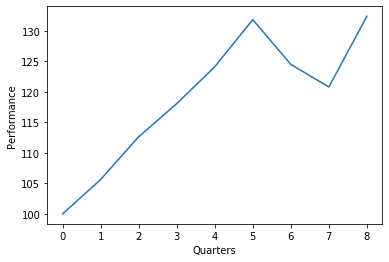

In [41]:
total_performance(8,Predictions_v2,labels_df_v2)

In [42]:
np.mean(scores),np.mean(test_scores)

(0.5496907583738518, -1.188336609589614)

In [43]:
dict1 = {}
for array in importances:
    if np.shape(array)[0] in dict1:
        dict1[np.shape(array)[0]]+=1
    else:
        dict1[np.shape(array)[0]] = 1

In [44]:
dict1

{27: 164}

(array([ 2.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  3.,  3.,
         2.,  7., 21., 41., 40., 35.,  6.]),
 array([-4.92039390e-05,  3.34070608e-02,  6.68633255e-02,  1.00319590e-01,
         1.33775855e-01,  1.67232120e-01,  2.00688384e-01,  2.34144649e-01,
         2.67600914e-01,  3.01057179e-01,  3.34513443e-01,  3.67969708e-01,
         4.01425973e-01,  4.34882238e-01,  4.68338502e-01,  5.01794767e-01,
         5.35251032e-01,  5.68707297e-01,  6.02163561e-01,  6.35619826e-01,
         6.69076091e-01]),
 <a list of 20 Patch objects>)

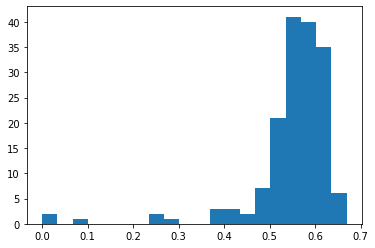

In [58]:
plt.hist(scores,bins=20)

In [46]:
importance_df = pd.DataFrame(importances)

In [49]:
importance_df.mean(axis=0)

0     0.042054
1     0.037673
2     0.031892
3     0.032420
4     0.034045
5     0.037496
6     0.035973
7     0.032713
8     0.030288
9     0.032458
10    0.031140
11    0.034318
12    0.035774
13    0.037657
14    0.033258
15    0.034217
16    0.054006
17    0.039475
18    0.040413
19    0.036238
20    0.054126
21    0.038574
22    0.037300
23    0.034996
24    0.037773
25    0.031300
26    0.036325
dtype: float64

# Running Random Forest on Feature Selected Data

In [14]:
filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

f_all_preds = {}
f_all_labels = {}

i = 0

f_scores = []
f_test_scores =[]
f_importances = []

#for i in range(15):
for i in range(len(filenames)):
    try:
        df = pd.read_csv("./All_Data/feature_clean_data/"+str(filenames[i]), delimiter = ',')
        preds,labels,score,test_score,importance = random_forest(df)
        
        f_scores.append(score)
        f_test_scores.append(test_score)
        f_importances.append(importance)
        
        f_all_preds[str(filenames[i])] = preds
        f_all_labels[str(filenames[i])] = labels
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


In [16]:
f_Predictions = pd.DataFrame.from_dict(f_all_preds, orient='index')
f_labels_df = pd.DataFrame.from_dict(f_all_labels, orient='index')

Quarter :1	 Result :6.337020830091511 %
Quarter :2	 Result :7.096998680696913 %
Quarter :3	 Result :4.985630979330426 %
Quarter :4	 Result :2.3818857961337274 %
Quarter :5	 Result :5.771973630151581 %
Quarter :6	 Result :-2.5376181839790135 %
Quarter :7	 Result :0.610399899023856 %
Quarter :8	 Result :9.392426359157847 %
Compounded Result :38.88410213980853 %
Quarterly Compounded Growth Rate : 4.191326429150277 %
Annual Compounded Growth Rate : 17.849099334618824 %
Sharpe Ratio : 1.0376420643777526


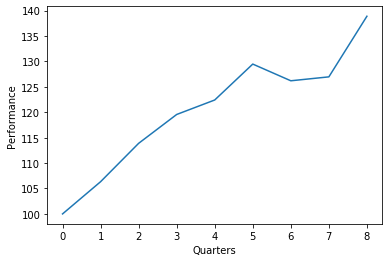

In [17]:
total_performance(8,f_Predictions,f_labels_df)

In [19]:
f_Predictions.to_csv('./All_Data/Labels_and_Preds/f_Predictions_RF.csv')
#labels_df.to_csv('./All_Data/Labels_and_Preds/Labels.csv')

# Running Random forest on Standard Dataset

In [1]:
  
features_to_select = open('features.txt','r').read()
features_to_select = features_to_select.split('\n')[:-1]

In [26]:
filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]


standard_all_preds = {}
standard_all_labels = {}

i = 0

standard_scores = []
standard_test_scores =[]
standard_importances = []

#for i in range(15):
for i in range(len(filenames)):
    try:
        df1 = pd.read_csv("./All_Data/new_clean_data_v2/"+str(filenames[i]), delimiter = ',')
        df1.set_index("Unnamed: 0", inplace =True)
        df1 = df1.drop(columns = ['Current Assets','Current Liabilities','Current ratio'])
        df1 = df1[features_to_select]
        
        preds,labels,score,test_score,importance = random_forest(df1)
        
        standard_scores.append(score)
        standard_test_scores.append(test_score)
        standard_importances.append(importance)
        
        standard_all_preds[str(filenames[i])] = preds
        standard_all_labels[str(filenames[i])] = labels
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [30]:
standard_Predictions = pd.DataFrame.from_dict(standard_all_preds, orient='index')
standard_labels_df = pd.DataFrame.from_dict(standard_all_labels, orient='index')

Quarter :1	 Result :6.362739903575291 %
Quarter :2	 Result :7.112717384816965 %
Quarter :3	 Result :6.1689796523740865 %
Quarter :4	 Result :2.929059243840122 %
Quarter :5	 Result :4.436195913161853 %
Quarter :6	 Result :-6.418801756041728 %
Quarter :7	 Result :-1.2551187063754319 %
Quarter :8	 Result :8.879558935684955 %
Compounded Result :30.817784994077755 %
Quarterly Compounded Growth Rate : 3.4149553840506996 %
Annual Compounded Growth Rate : 14.375602728063352 %
Sharpe Ratio : 0.9214553337022604


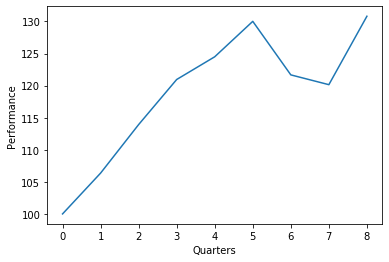

In [31]:
total_performance(8,standard_Predictions,standard_labels_df)

In [32]:
standard_Predictions.to_csv('./All_Data/Labels_and_Preds/standard_Predictions_RF.csv')

array([ 0.04303669,  0.03986242,  0.02571154, -0.00156309,  0.02347489,
       -0.05318086,  0.03948295, -0.01200482])